In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False)

In [22]:
X, y = mnist.data, mnist.target

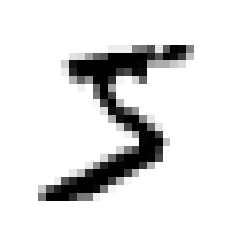

5


In [28]:
def plot_img(img_data):
    image = img_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis(False)
    plt.show()

plot_img(X[0, :])
print(y[0])

In [35]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [36]:
## Testing a simple classifier

In [41]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [42]:
from sklearn.linear_model import SGDClassifier

In [43]:
sgd_clf = SGDClassifier(random_state= 42)

sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [46]:
from sklearn.model_selection import cross_val_score

p = cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring='accuracy')

In [47]:
print(p.mean())

0.9570333333333334


In [95]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [97]:
cross_val_score(dummy_clf, X_train, y_train_5, cv = 3 , scoring= 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [104]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [105]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mtr = confusion_matrix(y_train_5, y_train_pred)

# sns.heatmap(conf_mtr, annot=True)
conf_mtr

array([[53892,   687],
       [ 1891,  3530]])

In [108]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [109]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [111]:
### We will manually decide the classificaiton method
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, method = 'decision_function', cv = 3)

In [116]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

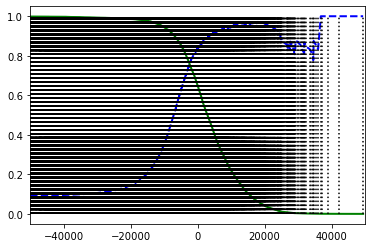

In [124]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.xlim(-50000, 50000)
plt.grid(False)
plt.show()

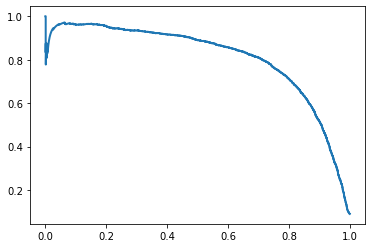

In [125]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

In [126]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557